In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import os

In [124]:
feasible_df = pd.DataFrame()
solve_time_df = pd.DataFrame()
cost_df = pd.DataFrame()

filenames = []
dfs = []

result_path = '../results/experiment/1PDPTW_generated_d51_i200_tmin300_tmax500_sd2022_test'
for file in os.listdir(result_path):
    if not file.startswith('.') and file != 'archive':
        file_name = file.split('.', 1)[0]
        filenames.append(file_name)
        print(file_name)
        dfs.append(pd.read_csv(result_path + '/' + file))
#     break

mip
rl30_repair_ls0
rl30_repair_ls1
rl30_repair_ls2
rl14_repair_mip
rl30_repair_alns
rl14_repair_alns
rl30
rl14
heuristic
feasible_tour
rl14_repair_ls2
heuristic_repair_ls2
rl14_repair_ls0
rl14_repair_ls1
rl30_repair_mip
mip_1min
alns


In [125]:
cost_df = pd.DataFrame()

for i, df in enumerate(dfs):
#     print(filenames[i])
    cost_df[filenames[i]] = np.where(df['status'].isin(['feasible', 'JobSolveStatus.FEASIBLE_SOLUTION']), df['cost'], np.nan)
cost_df

,mip,rl30_repair_ls0,rl30_repair_ls1,rl30_repair_ls2,rl14_repair_mip,rl30_repair_alns,rl14_repair_alns,rl30,rl14,heuristic,feasible_tour,rl14_repair_ls2,heuristic_repair_ls2,rl14_repair_ls0,rl14_repair_ls1,rl30_repair_mip,mip_1min,alns
0,5340.0,NaN,NaN,NaN,5018.0,5038.0,4823.0,NaN,NaN,NaN,5647.0,NaN,NaN,NaN,NaN,4751.0,5061.0,4620.0
1,5260.0,NaN,NaN,NaN,5811.0,5706.0,5729.0,NaN,NaN,NaN,5648.0,NaN,NaN,NaN,NaN,5811.0,5242.0,5427.0
2,5158.0,NaN,NaN,NaN,5423.0,NaN,5474.0,NaN,NaN,NaN,5039.0,NaN,NaN,NaN,NaN,5506.0,4534.0,5172.0
3,5153.0,NaN,NaN,NaN,5652.0,NaN,5454.0,NaN,NaN,NaN,4851.0,NaN,NaN,NaN,NaN,5680.0,5181.0,5350.0
4,4807.0,NaN,NaN,NaN,5332.0,5138.0,5184.0,NaN,NaN,NaN,5767.0,NaN,NaN,NaN,NaN,5395.0,5268.0,5019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5578.0,NaN,NaN,NaN,5507.0,5275.0,NaN,NaN,NaN,NaN,4904.0,NaN,NaN,NaN,NaN,5401.0,4207.0,5261.0
196,5127.0,NaN,NaN,NaN,5238.0,NaN,5042.0,NaN,NaN,NaN,4968.0,NaN,NaN,NaN,NaN,4953.0,5408.0,4585.0
197,4674.0,NaN,NaN,NaN,4796.0,4696.0,4919.0,NaN,NaN,NaN,4980.0,NaN,NaN,NaN,NaN,4713.0,4769.0,4573.0
198,5333.0,NaN,NaN,NaN,5042.0,NaN,NaN,NaN,NaN,NaN,6264.0,NaN,NaN,NaN,NaN,5042.0,5383.0,4693.0


In [126]:
cost_df['min_cost'] = cost_df.min(axis=1)

In [127]:
for name in filenames:
    cost_df[name+'_min'] = np.where(
        cost_df[name] == cost_df['min_cost'], 1, 0)

In [128]:
no_repair_list = ['mip_min', 'mip_1min_min', 'alns_min', 'heuristic_min', 'heuristic_repair_ls2_min', 'feasible_tour_min']
repair_list = ['rl14_min', 'rl14_repair_ls2_min', 'rl14_repair_alns_min', 'rl14_repair_mip_min', 
               'rl30_min', 'rl30_repair_ls2_min', 'rl30_repair_alns_min', 'rl30_repair_mip_min']


In [129]:
cost_df[no_repair_list].sum()/200

mip_min                     0.360
mip_1min_min                0.145
alns_min                    0.360
heuristic_min               0.000
heuristic_repair_ls2_min    0.000
feasible_tour_min           0.135
dtype: float64

In [130]:
cost_df[repair_list].sum()/200

rl14_min                0.0
rl14_repair_ls2_min     0.0
rl14_repair_alns_min    0.0
rl14_repair_mip_min     0.0
rl30_min                0.0
rl30_repair_ls2_min     0.0
rl30_repair_alns_min    0.0
rl30_repair_mip_min     0.0
dtype: float64

In [131]:
cost_df.sum()/200

mip                         5006.105
rl30_repair_ls0              306.240
rl30_repair_ls1               54.685
rl30_repair_ls2              131.850
rl14_repair_mip             5308.335
rl30_repair_alns            2254.705
rl14_repair_alns            2228.180
rl30                           0.000
rl14                           0.000
heuristic                      0.000
feasible_tour               5326.030
rl14_repair_ls2                0.000
heuristic_repair_ls2          29.050
rl14_repair_ls0                0.000
rl14_repair_ls1                0.000
rl30_repair_mip             5312.940
mip_1min                    4370.450
alns                        4949.925
min_cost                    4650.835
mip_min                        0.360
rl30_repair_ls0_min            0.000
rl30_repair_ls1_min            0.000
rl30_repair_ls2_min            0.000
rl14_repair_mip_min            0.000
rl30_repair_alns_min           0.000
rl14_repair_alns_min           0.000
rl30_min                       0.000
r

In [132]:
cost_df

,mip,rl30_repair_ls0,rl30_repair_ls1,rl30_repair_ls2,rl14_repair_mip,rl30_repair_alns,rl14_repair_alns,rl30,rl14,heuristic,...,rl14_min,heuristic_min,feasible_tour_min,rl14_repair_ls2_min,heuristic_repair_ls2_min,rl14_repair_ls0_min,rl14_repair_ls1_min,rl30_repair_mip_min,mip_1min_min,alns_min
0,5340.0,NaN,NaN,NaN,5018.0,5038.0,4823.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,5260.0,NaN,NaN,NaN,5811.0,5706.0,5729.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,5158.0,NaN,NaN,NaN,5423.0,NaN,5474.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,5153.0,NaN,NaN,NaN,5652.0,NaN,5454.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
4,4807.0,NaN,NaN,NaN,5332.0,5138.0,5184.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5578.0,NaN,NaN,NaN,5507.0,5275.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
196,5127.0,NaN,NaN,NaN,5238.0,NaN,5042.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
197,4674.0,NaN,NaN,NaN,4796.0,4696.0,4919.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
198,5333.0,NaN,NaN,NaN,5042.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [133]:
optimality_gap_df = pd.DataFrame()
for i, df in enumerate(dfs):
    optimality_gap_df[filenames[i]] = np.where(cost_df[filenames[i]].notnull(), (cost_df[filenames[i]]-cost_df['min_cost'])/cost_df['min_cost'], np.NAN)
optimality_gap_df

,mip,rl30_repair_ls0,rl30_repair_ls1,rl30_repair_ls2,rl14_repair_mip,rl30_repair_alns,rl14_repair_alns,rl30,rl14,heuristic,feasible_tour,rl14_repair_ls2,heuristic_repair_ls2,rl14_repair_ls0,rl14_repair_ls1,rl30_repair_mip,mip_1min,alns
0,0.155844,NaN,NaN,NaN,0.086147,0.090476,0.043939,NaN,NaN,NaN,0.222294,NaN,NaN,NaN,NaN,0.028355,0.095455,0.000000
1,0.003434,NaN,NaN,NaN,0.108546,0.088516,0.092903,NaN,NaN,NaN,0.077451,NaN,NaN,NaN,NaN,0.108546,0.000000,0.035292
2,0.137627,NaN,NaN,NaN,0.196074,NaN,0.207322,NaN,NaN,NaN,0.111381,NaN,NaN,NaN,NaN,0.214380,0.000000,0.140715
3,0.062255,NaN,NaN,NaN,0.165121,NaN,0.124304,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.170893,0.068027,0.102865
4,0.000000,NaN,NaN,NaN,0.109216,0.068858,0.078427,NaN,NaN,NaN,0.199709,NaN,NaN,NaN,NaN,0.122322,0.095902,0.044102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.325885,NaN,NaN,NaN,0.309009,0.253863,NaN,NaN,NaN,NaN,0.165676,NaN,NaN,NaN,NaN,0.283813,0.000000,0.250535
196,0.118212,NaN,NaN,NaN,0.142421,NaN,0.099673,NaN,NaN,NaN,0.083533,NaN,NaN,NaN,NaN,0.080262,0.179498,0.000000
197,0.022086,NaN,NaN,NaN,0.048764,0.026897,0.075661,NaN,NaN,NaN,0.089001,NaN,NaN,NaN,NaN,0.030614,0.042860,0.000000
198,0.136373,NaN,NaN,NaN,0.074366,NaN,NaN,NaN,NaN,NaN,0.334754,NaN,NaN,NaN,NaN,0.074366,0.147027,0.000000


In [134]:
optimality_gap_df_pos = optimality_gap_df.where(optimality_gap_df >= 0, np.NAN)

In [135]:
box_df = optimality_gap_df_pos[['mip_1min', 'alns', 'feasible_tour', 'heuristic_repair_ls2', 'rl14', 'rl14_repair_ls2',
                     'rl14_repair_alns', 'rl14_repair_mip', 'rl30', 'rl30_repair_ls2',
                     'rl30_repair_alns', 'rl30_repair_mip']]

Text(0, 0.5, 'average best solution gap')

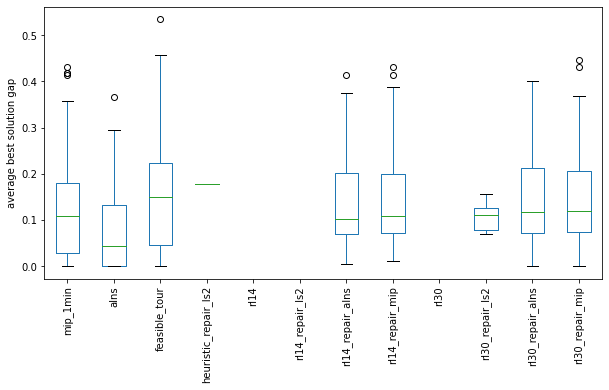

In [136]:
ax = box_df.boxplot(grid=False, rot=90,figsize = (10,5))
ax.set_ylabel("average best solution gap")

In [ ]:
ax = optimality_gap_df_pos.boxplot(grid=False, rot=90,figsize = (10,5))
ax.set_ylabel("average optimality gap")

In [2]:
mip = pd.read_csv('../results/experiment/1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test/mip_rpnone_1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test_all.csv')
alns = pd.read_csv('../results/experiment/1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test/alns_rp_trd0_ed1PDPTW_generated_d15_i100000_tmin300_tmax500_sd2022_ne20_bs30001_lr32_bt0005_dst1_sd06.csv')
rl = pd.read_csv('../results/experiment/1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test/rl_rp_trd0_ed1PDPTW_generated_d15_i100000_tmin300_tmax500_sd2022_ne20_bs30001_lr32_bt0005_dst1_sd06.csv')
rl_repair_cplex = pd.read_csv('../results/experiment/1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test/rl_repair_rpmip_cplex_trd0_ed1PDPTW_generated_d15_i100000_tmin300_tmax500_sd2022_ne20_bs30001_lr32_bt0005_dst1_sd06.csv')
rl_repair_alns = pd.read_csv('../results/experiment/1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test/rl_repair_rpalns_trd0_ed1PDPTW_generated_d15_i100000_tmin300_tmax500_sd2022_ne20_bs30001_lr32_bt0005_dst1_sd06.csv')
rl_repair_ls_first = pd.read_csv('../results/experiment/1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test/rl_repair_rpls_trd0_ed1PDPTW_generated_d15_i100000_tmin300_tmax500_sd2022_ne20_bs30001_lr32_bt0005_dst1_sd06.csv')
rl_repair_ls_least = pd.read_csv('../results/experiment/1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test/rl_repair_rpls_trd1_ed1PDPTW_generated_d15_i100000_tmin300_tmax500_sd2022_ne20_bs30001_lr32_bt0005_dst1_sd06.csv')
rl_repair_ls_most = pd.read_csv('../results/experiment/1PDPTW_generated_d15_i1000_tmin300_tmax500_sd2022_test/rl_repair_rpls_trd2_ed1PDPTW_generated_d15_i100000_tmin300_tmax500_sd2022_ne20_bs30001_lr32_bt0005_dst1_sd06.csv')

In [3]:
rl

,instance,solution,cost,solve_time,status,num_iter,num_dict
0,generated-815.txt,"[1, 12, 7, 9, 10, 11, 3, 15, 6, 5, 2, 13, 14, ...",1941,0.009673,infeasible,NaN,NaN
1,generated-801.txt,"[1, 7, 4, 2, 5, 3, 9, 10, 11, 6, 15, 13, 12, 8...",1425,0.008144,infeasible,NaN,NaN
2,generated-829.txt,"[1, 2, 11, 9, 13, 14, 10, 6, 15, 4, 3, 8, 5, 1...",1462,0.006718,infeasible,NaN,NaN
3,generated-197.txt,"[1, 2, 7, 3, 8, 6, 4, 15, 13, 12, 10, 5, 14, 9...",1813,0.007593,feasible,NaN,NaN
4,generated-183.txt,"[1, 10, 2, 12, 13, 7, 9, 4, 8, 5, 14, 11, 3, 1...",1955,0.005857,infeasible,NaN,NaN
...,...,...,...,...,...,...,...
995,generated-171.txt,"[1, 3, 6, 13, 9, 7, 2, 8, 4, 14, 5, 15, 12, 11...",1538,0.005896,infeasible,NaN,NaN
996,generated-617.txt,"[1, 13, 12, 11, 5, 3, 7, 4, 2, 10, 6, 15, 8, 9...",2048,0.007354,infeasible,NaN,NaN
997,generated-824.txt,"[1, 8, 7, 3, 9, 6, 12, 14, 13, 5, 11, 10, 15, ...",1607,0.005710,feasible,NaN,NaN
998,generated-830.txt,"[1, 14, 12, 11, 3, 4, 9, 7, 5, 2, 10, 15, 6, 8...",2182,0.007478,infeasible,NaN,NaN


In [4]:
dfs = [mip, rl, alns, rl_repair_cplex, rl_repair_alns, rl_repair_ls_first, rl_repair_ls_least, rl_repair_ls_most]
dfs_names = ['mip', 'rl', 'alns', 'rl_repair_cplex', 'rl_repair_alns', 'rl_repair_ls_first', 'rl_repair_ls_least', 'rl_repair_ls_most']
# dfs = [mip, rl]
# dfs_names = ['mip', 'rl']

In [5]:
cost_df = pd.DataFrame()
for i, df in enumerate(dfs):
    cost_df[dfs_names[i]] = np.where(df['status'].isin(['feasible', 'JobSolveStatus.OPTIMAL_SOLUTION']), df['cost'], np.nan)
cost_df

,mip,rl,alns,rl_repair_cplex,rl_repair_alns,rl_repair_ls_first,rl_repair_ls_least,rl_repair_ls_most
0,1430.0,NaN,NaN,1799.0,NaN,1675.0,1664.0,1675.0
1,1283.0,NaN,1299.0,1626.0,1305.0,1556.0,1534.0,1556.0
2,1222.0,NaN,1257.0,1709.0,1337.0,1566.0,1566.0,1566.0
3,1544.0,1813.0,NaN,2001.0,NaN,1813.0,1813.0,1813.0
4,1223.0,NaN,1241.0,1471.0,1241.0,1801.0,1801.0,1543.0
...,...,...,...,...,...,...,...,...
995,1309.0,NaN,1299.0,1520.0,NaN,1487.0,1487.0,1487.0
996,1200.0,NaN,1222.0,1530.0,1222.0,1783.0,1515.0,1377.0
997,1341.0,1607.0,NaN,1521.0,NaN,1607.0,1607.0,1607.0
998,1379.0,NaN,1422.0,1820.0,1419.0,1929.0,1602.0,1944.0


In [6]:
rl.head()

,instance,solution,cost,solve_time,status,num_iter,num_dict
0,generated-815.txt,"[1, 12, 7, 9, 10, 11, 3, 15, 6, 5, 2, 13, 14, ...",1941,0.009673,infeasible,NaN,NaN
1,generated-801.txt,"[1, 7, 4, 2, 5, 3, 9, 10, 11, 6, 15, 13, 12, 8...",1425,0.008144,infeasible,NaN,NaN
2,generated-829.txt,"[1, 2, 11, 9, 13, 14, 10, 6, 15, 4, 3, 8, 5, 1...",1462,0.006718,infeasible,NaN,NaN
3,generated-197.txt,"[1, 2, 7, 3, 8, 6, 4, 15, 13, 12, 10, 5, 14, 9...",1813,0.007593,feasible,NaN,NaN
4,generated-183.txt,"[1, 10, 2, 12, 13, 7, 9, 4, 8, 5, 14, 11, 3, 1...",1955,0.005857,infeasible,NaN,NaN


In [7]:
feasibility_df = pd.DataFrame()
for i, df in enumerate(dfs):
    feasibility_df[dfs_names[i]] = df['status']
feasibility_df

,mip,rl,alns,rl_repair_cplex,rl_repair_alns,rl_repair_ls_first,rl_repair_ls_least,rl_repair_ls_most
0,JobSolveStatus.OPTIMAL_SOLUTION,infeasible,infeasible,feasible,infeasible,feasible,feasible,feasible
1,JobSolveStatus.OPTIMAL_SOLUTION,infeasible,feasible,feasible,feasible,feasible,feasible,feasible
2,JobSolveStatus.OPTIMAL_SOLUTION,infeasible,feasible,feasible,feasible,feasible,feasible,feasible
3,JobSolveStatus.OPTIMAL_SOLUTION,feasible,infeasible,feasible,infeasible,feasible,feasible,feasible
4,JobSolveStatus.OPTIMAL_SOLUTION,infeasible,feasible,feasible,feasible,feasible,feasible,feasible
...,...,...,...,...,...,...,...,...
995,JobSolveStatus.OPTIMAL_SOLUTION,infeasible,feasible,feasible,infeasible,feasible,feasible,feasible
996,JobSolveStatus.OPTIMAL_SOLUTION,infeasible,feasible,feasible,feasible,feasible,feasible,feasible
997,JobSolveStatus.OPTIMAL_SOLUTION,feasible,infeasible,feasible,infeasible,feasible,feasible,feasible
998,JobSolveStatus.OPTIMAL_SOLUTION,infeasible,feasible,feasible,feasible,feasible,feasible,feasible


In [8]:
optimality_gap_df = pd.DataFrame()
for i, df in enumerate(dfs):
    optimality_gap_df[dfs_names[i]] = np.where(cost_df[dfs_names[i]].notnull(), (cost_df[dfs_names[i]]-cost_df['mip'])/cost_df['mip'], np.NAN)
optimality_gap_df

,mip,rl,alns,rl_repair_cplex,rl_repair_alns,rl_repair_ls_first,rl_repair_ls_least,rl_repair_ls_most
0,0.0,NaN,NaN,0.258042,NaN,0.171329,0.163636,0.171329
1,0.0,NaN,0.012471,0.267342,0.017147,0.212783,0.195635,0.212783
2,0.0,NaN,0.028642,0.398527,0.094108,0.281506,0.281506,0.281506
3,0.0,0.174223,NaN,0.295984,NaN,0.174223,0.174223,0.174223
4,0.0,NaN,0.014718,0.202780,0.014718,0.472608,0.472608,0.261652
...,...,...,...,...,...,...,...,...
995,0.0,NaN,-0.007639,0.161192,NaN,0.135982,0.135982,0.135982
996,0.0,NaN,0.018333,0.275000,0.018333,0.485833,0.262500,0.147500
997,0.0,0.198359,NaN,0.134228,NaN,0.198359,0.198359,0.198359
998,0.0,NaN,0.031182,0.319797,0.029007,0.398840,0.161711,0.409717


In [9]:
optimality_gap_df[optimality_gap_df['rl']<0]

,mip,rl,alns,rl_repair_cplex,rl_repair_alns,rl_repair_ls_first,rl_repair_ls_least,rl_repair_ls_most
844,0.0,-0.039437,NaN,0.052817,NaN,-0.039437,-0.039437,-0.039437


In [10]:
rl[844:845]

,instance,solution,cost,solve_time,status,num_iter,num_dict
844,generated-412.txt,"[1, 15, 9, 10, 13, 12, 2, 7, 6, 14, 3, 8, 5, 1...",1364,0.008008,feasible,NaN,NaN


In [11]:
mip[844:845]

,instance,solution,cost,solve_time,status
844,generated-412.txt,"[1, 15, 9, 2, 6, 13, 3, 10, 12, 14, 8, 7, 11, ...",1420,17.526579,JobSolveStatus.OPTIMAL_SOLUTION


In [12]:
time_df = pd.DataFrame()
for i, df in enumerate(dfs):
    time_df[dfs_names[i]] = df['solve_time']
time_df

,mip,rl,alns,rl_repair_cplex,rl_repair_alns,rl_repair_ls_first,rl_repair_ls_least,rl_repair_ls_most
0,0.791217,0.009673,0.904635,0.433782,0.837477,0.024747,0.024255,0.026049
1,2.774093,0.008144,0.767357,0.184294,1.294664,0.014840,0.015572,0.016158
2,0.837095,0.006718,0.665415,0.224283,0.868021,0.009446,0.007127,0.011966
3,4.367040,0.007593,0.878962,0.227787,1.048314,0.041184,0.008829,0.008417
4,7.041932,0.005857,0.802289,0.224220,0.760196,0.028978,0.012008,0.135372
...,...,...,...,...,...,...,...,...
995,6.535790,0.005896,0.787444,0.203532,0.673303,0.007516,0.009855,0.009568
996,0.879829,0.007354,0.783580,0.244297,0.748743,0.071021,0.105870,0.244763
997,7.938623,0.005710,0.940119,0.216311,0.930922,0.006541,0.007198,0.006611
998,4.093344,0.007478,1.490736,0.196325,1.239269,0.012344,0.347328,0.015890


In [13]:
ls_dfs = [rl_repair_ls_first, rl_repair_ls_least, rl_repair_ls_most]
ls_dfs_names = ['rl_repair_ls_first', 'rl_repair_ls_least', 'rl_repair_ls_most']
iteration_df = pd.DataFrame()
for i, df in enumerate(ls_dfs):
    iteration_df[ls_dfs_names[i]] = df['num_iter']
iteration_df

,rl_repair_ls_first,rl_repair_ls_least,rl_repair_ls_most
0,8,5,9
1,2,4,2
2,1,1,1
3,0,0,0
4,1,5,105
...,...,...,...
995,3,3,3
996,94,113,296
997,0,0,0
998,7,420,7


In [14]:
for col in iteration_df.columns:
    print(col, iteration_df[col].mean())

rl_repair_ls_first 91.034
rl_repair_ls_least 50.218
rl_repair_ls_most 54.405


In [15]:
# restart_df = pd.DataFrame()
# for i, df in enumerate(ls_dfs):
#     restart_df[ls_dfs_names[i]] = df['restart']
# restart_df

In [16]:
time_ma = pd.DataFrame()
for col in time_df.columns:
    time_ma[col] = time_df[col].rolling(50).mean()

<AxesSubplot:>

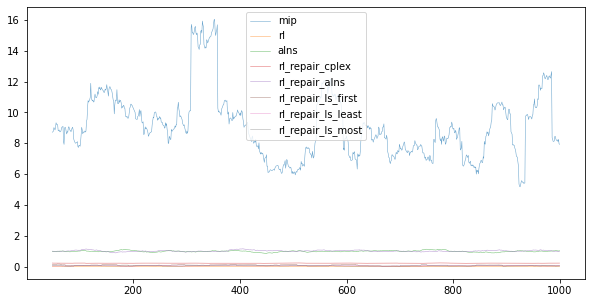

In [17]:
time_ma.plot(figsize=(10,5), alpha = 0.7, linewidth=0.5)

<AxesSubplot:>

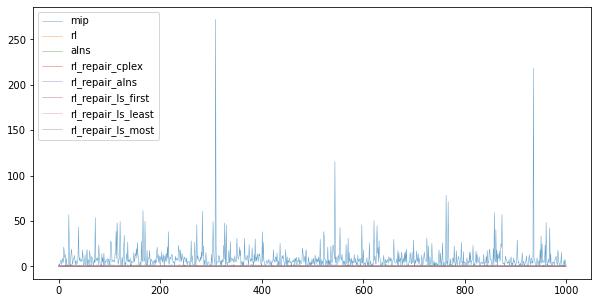

In [18]:
time_df.plot(figsize=(10,5), alpha = 0.7, linewidth=0.5)

Text(0, 0.5, 'time(secs)')

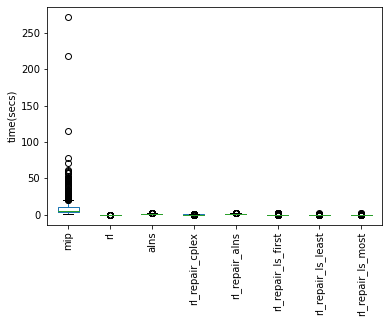

In [25]:
ax = time_df.boxplot(grid=False, rot=90)
ax.set_ylabel("time(secs)")

Text(0, 0.5, 'avg optimality gap')

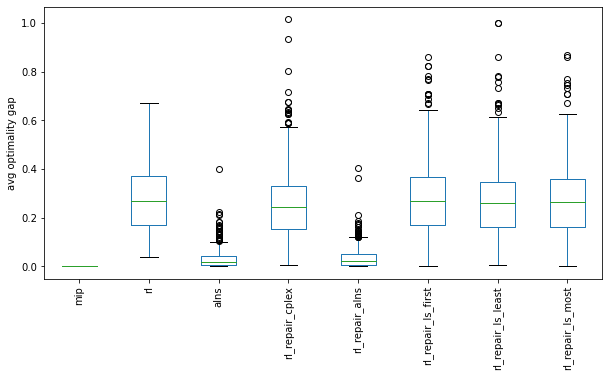

In [26]:
ax = optimality_gap_df_pos.boxplot(grid=False, rot=90,figsize = (10,5))
ax.set_ylabel("average optimality gap")

In [21]:
optimality_gap_df_pos = optimality_gap_df.where(optimality_gap_df >= 0, np.NAN)

In [96]:
optimality_ma = pd.DataFrame()
for col in optimality_gap_df_pos.columns:
    optimality_ma[col] = optimality_gap_df_pos[col].rolling(50).mean()
# optimality_ma = optimality_ma.fillna(1)

<AxesSubplot:>

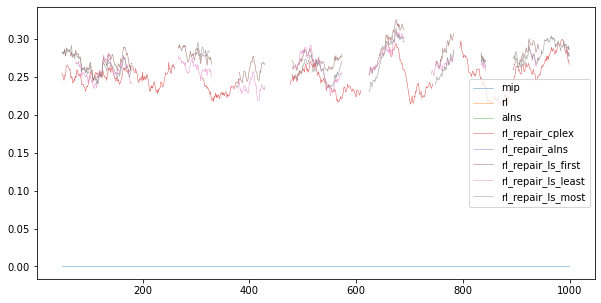

In [97]:
optimality_ma.plot(figsize=(10,5), alpha = 0.8, linewidth=0.5)

<AxesSubplot:>

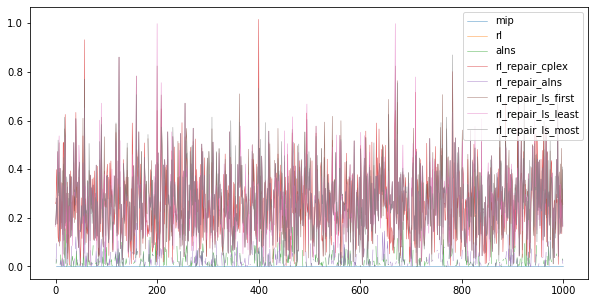

In [89]:
optimality_gap_df_pos.plot(figsize=(10,5), alpha = 0.8, linewidth=0.5)

In [49]:
for col in optimality_gap_df.columns:
    print(col, (optimality_gap_df[col] < 0.00001).sum()/10)


mip 100.0
rl 0.1
alns 12.5
rl_repair_cplex 0.5
rl_repair_alns 12.6
rl_repair_ls_first 1.0
rl_repair_ls_least 1.1
rl_repair_ls_most 1.2


In [58]:
for col in optimality_gap_df.columns:
    print(col, optimality_gap_df[col].mean())


mip 0.0
rl 0.2730380799768102
alns 0.01894657982683957
rl_repair_cplex 0.25240466406325746
rl_repair_alns 0.022457749724944055
rl_repair_ls_first 0.2739181944841998
rl_repair_ls_least 0.2620188143104906
rl_repair_ls_most 0.26535921515534416


In [23]:
for col in time_df.columns:
    print(col, time_df[col].mean())

mip 9.027690706014633
rl 0.0070189476013183105
alns 0.9876684265136719
rl_repair_cplex 0.2212538070678711
rl_repair_alns 1.0121664364337921
rl_repair_ls_first 0.07476110887527462
rl_repair_ls_least 0.051627294301986655
rl_repair_ls_most 0.05365292882919307


In [57]:
for col in feasibility_df.columns:
    print(col, (feasibility_df[col] == 'feasible').sum()/10)


mip 0.0
rl 10.8
alns 66.7
rl_repair_cplex 100.0
rl_repair_alns 65.9
rl_repair_ls_first 100.0
rl_repair_ls_least 100.0
rl_repair_ls_most 100.0


In [56]:
rl

,instance,solution,cost,solve_time,status,num_iter,num_dict
0,generated-815.txt,"[1, 12, 7, 9, 10, 11, 3, 15, 6, 5, 2, 13, 14, ...",1941,0.009673,infeasible,NaN,NaN
1,generated-801.txt,"[1, 7, 4, 2, 5, 3, 9, 10, 11, 6, 15, 13, 12, 8...",1425,0.008144,infeasible,NaN,NaN
2,generated-829.txt,"[1, 2, 11, 9, 13, 14, 10, 6, 15, 4, 3, 8, 5, 1...",1462,0.006718,infeasible,NaN,NaN
3,generated-197.txt,"[1, 2, 7, 3, 8, 6, 4, 15, 13, 12, 10, 5, 14, 9...",1813,0.007593,feasible,NaN,NaN
4,generated-183.txt,"[1, 10, 2, 12, 13, 7, 9, 4, 8, 5, 14, 11, 3, 1...",1955,0.005857,infeasible,NaN,NaN
...,...,...,...,...,...,...,...
995,generated-171.txt,"[1, 3, 6, 13, 9, 7, 2, 8, 4, 14, 5, 15, 12, 11...",1538,0.005896,infeasible,NaN,NaN
996,generated-617.txt,"[1, 13, 12, 11, 5, 3, 7, 4, 2, 10, 6, 15, 8, 9...",2048,0.007354,infeasible,NaN,NaN
997,generated-824.txt,"[1, 8, 7, 3, 9, 6, 12, 14, 13, 5, 11, 10, 15, ...",1607,0.005710,feasible,NaN,NaN
998,generated-830.txt,"[1, 14, 12, 11, 3, 4, 9, 7, 5, 2, 10, 15, 6, 8...",2182,0.007478,infeasible,NaN,NaN


In [25]:
rl[3:4]

,instance,solution,cost,solve_time,status,num_iter,num_dict
3,generated-197.txt,"[0, 1, 6, 2, 7, 5, 3, 14, 12, 11, 9, 4, 13, 8,...",1479,0.007484,feasible,NaN,NaN


In [26]:
mip[3:4]

,instance,solution,cost,solve_time,status
3,generated-197.txt,"[1, 7, 2, 3, 8, 15, 6, 4, 12, 13, 10, 9, 11, 1...",1544,9.536743e-07,JobSolveStatus.OPTIMAL_SOLUTION


In [44]:
rl_repair_ls_first.head()

,instance,solution,cost,solve_time,status,num_iter,num_dict
0,generated-815.txt,"[0, 8, 11, 10, 9, 14, 6, 5, 2, 4, 1, 12, 3, 13...",1630.287460,0.018804,feasible,8,"defaultdict(<class 'int'>, {'tw_violation': 8})"
1,generated-801.txt,"[0, 6, 3, 4, 1, 2, 8, 9, 10, 5, 14, 12, 7, 11,...",1634.677006,0.008019,feasible,2,"defaultdict(<class 'int'>, {'tw_violation': 2})"
2,generated-829.txt,"[0, 1, 10, 8, 12, 13, 9, 14, 5, 3, 2, 7, 4, 11...",1609.430912,0.009439,feasible,1,"defaultdict(<class 'int'>, {'tw_violation': 1})"
3,generated-197.txt,"[0, 1, 6, 2, 7, 5, 3, 14, 12, 11, 9, 4, 13, 8,...",1790.702154,0.007982,feasible,0,"defaultdict(<class 'int'>, {})"
4,generated-183.txt,"[0, 9, 1, 11, 12, 6, 8, 3, 7, 13, 4, 10, 2, 14...",1799.262199,0.009201,feasible,1,"defaultdict(<class 'int'>, {'tw_violation': 1})"


In [60]:
rl_repair_ls_first['num_dict'].str.split(',')

0      [defaultdict(<class 'int'>,  {'tw_violation': ...
1      [defaultdict(<class 'int'>,  {'tw_violation': ...
2      [defaultdict(<class 'int'>,  {'tw_violation': ...
3                      [defaultdict(<class 'int'>,  {})]
4      [defaultdict(<class 'int'>,  {'tw_violation': ...
                             ...                        
995    [defaultdict(<class 'int'>,  {'tw_violation': ...
996    [defaultdict(<class 'int'>,  {'tw_violation': ...
997                    [defaultdict(<class 'int'>,  {})]
998    [defaultdict(<class 'int'>,  {'tw_violation': ...
999    [defaultdict(<class 'int'>,  {'tw_violation': ...
Name: num_dict, Length: 1000, dtype: object

In [61]:
rl_repair_ls_first['new_num_dict'] = rl_repair_ls_first['num_dict'].str.split(',')

In [62]:
rl_repair_ls_first

,instance,solution,cost,solve_time,status,num_iter,num_dict,new_num_dict
0,generated-815.txt,"[1, 9, 12, 11, 10, 15, 7, 6, 3, 5, 2, 13, 4, 1...",1675,0.024747,feasible,8,"defaultdict(<class 'int'>, {'tw_violation': 8})","[defaultdict(<class 'int'>, {'tw_violation': ..."
1,generated-801.txt,"[1, 7, 4, 5, 2, 3, 9, 10, 11, 6, 15, 13, 8, 12...",1556,0.014840,feasible,2,"defaultdict(<class 'int'>, {'tw_violation': 2})","[defaultdict(<class 'int'>, {'tw_violation': ..."
2,generated-829.txt,"[1, 2, 11, 9, 13, 14, 10, 15, 6, 4, 3, 8, 5, 1...",1566,0.009446,feasible,1,"defaultdict(<class 'int'>, {'tw_violation': 1})","[defaultdict(<class 'int'>, {'tw_violation': ..."
3,generated-197.txt,"[1, 2, 7, 3, 8, 6, 4, 15, 13, 12, 10, 5, 14, 9...",1813,0.041184,feasible,0,"defaultdict(<class 'int'>, {})","[defaultdict(<class 'int'>, {})]"
4,generated-183.txt,"[1, 10, 2, 12, 13, 7, 9, 4, 8, 14, 5, 11, 3, 1...",1801,0.028978,feasible,1,"defaultdict(<class 'int'>, {'tw_violation': 1})","[defaultdict(<class 'int'>, {'tw_violation': ..."
...,...,...,...,...,...,...,...,...
995,generated-171.txt,"[1, 3, 13, 6, 9, 7, 2, 8, 4, 5, 15, 14, 12, 11...",1487,0.007516,feasible,3,"defaultdict(<class 'int'>, {'tw_violation': 3})","[defaultdict(<class 'int'>, {'tw_violation': ..."
996,generated-617.txt,"[1, 11, 13, 9, 4, 14, 3, 2, 7, 12, 5, 10, 6, 1...",1783,0.071021,feasible,94,"defaultdict(<class 'int'>, {'tw_violation': 92...","[defaultdict(<class 'int'>, {'tw_violation': ..."
997,generated-824.txt,"[1, 8, 7, 3, 9, 6, 12, 14, 13, 5, 11, 10, 15, ...",1607,0.006541,feasible,0,"defaultdict(<class 'int'>, {})","[defaultdict(<class 'int'>, {})]"
998,generated-830.txt,"[1, 14, 12, 3, 9, 11, 4, 2, 7, 5, 10, 15, 8, 1...",1929,0.012344,feasible,7,"defaultdict(<class 'int'>, {'tw_violation': 7})","[defaultdict(<class 'int'>, {'tw_violation': ..."


In [63]:
import ast

In [64]:
rl_repair_ls_first['new_num_dict'] = rl_repair_ls_first.num_dict.str[27:-1].map(ast.literal_eval)
rl_repair_ls_least['new_num_dict'] = rl_repair_ls_least.num_dict.str[27:-1].map(ast.literal_eval)
rl_repair_ls_most['new_num_dict'] = rl_repair_ls_most.num_dict.str[27:-1].map(ast.literal_eval)


In [65]:
rl_repair_ls_first[['tw_violation', 'restart', 'precedence_violation', 'capacity_violation']] = rl_repair_ls_first.new_num_dict.apply(pd.Series)
rl_repair_ls_least[['tw_violation', 'restart', 'precedence_violation', 'capacity_violation']] = rl_repair_ls_least.new_num_dict.apply(pd.Series)
rl_repair_ls_most[['tw_violation', 'restart', 'precedence_violation', 'capacity_violation']] = rl_repair_ls_most.new_num_dict.apply(pd.Series)


In [66]:
rl_repair_ls_first

,instance,solution,cost,solve_time,status,num_iter,num_dict,new_num_dict,tw_violation,restart,precedence_violation,capacity_violation
0,generated-815.txt,"[1, 9, 12, 11, 10, 15, 7, 6, 3, 5, 2, 13, 4, 1...",1675,0.024747,feasible,8,"defaultdict(<class 'int'>, {'tw_violation': 8})",{'tw_violation': 8},8.0,NaN,NaN,NaN
1,generated-801.txt,"[1, 7, 4, 5, 2, 3, 9, 10, 11, 6, 15, 13, 8, 12...",1556,0.014840,feasible,2,"defaultdict(<class 'int'>, {'tw_violation': 2})",{'tw_violation': 2},2.0,NaN,NaN,NaN
2,generated-829.txt,"[1, 2, 11, 9, 13, 14, 10, 15, 6, 4, 3, 8, 5, 1...",1566,0.009446,feasible,1,"defaultdict(<class 'int'>, {'tw_violation': 1})",{'tw_violation': 1},1.0,NaN,NaN,NaN
3,generated-197.txt,"[1, 2, 7, 3, 8, 6, 4, 15, 13, 12, 10, 5, 14, 9...",1813,0.041184,feasible,0,"defaultdict(<class 'int'>, {})",{},NaN,NaN,NaN,NaN
4,generated-183.txt,"[1, 10, 2, 12, 13, 7, 9, 4, 8, 14, 5, 11, 3, 1...",1801,0.028978,feasible,1,"defaultdict(<class 'int'>, {'tw_violation': 1})",{'tw_violation': 1},1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,generated-171.txt,"[1, 3, 13, 6, 9, 7, 2, 8, 4, 5, 15, 14, 12, 11...",1487,0.007516,feasible,3,"defaultdict(<class 'int'>, {'tw_violation': 3})",{'tw_violation': 3},3.0,NaN,NaN,NaN
996,generated-617.txt,"[1, 11, 13, 9, 4, 14, 3, 2, 7, 12, 5, 10, 6, 1...",1783,0.071021,feasible,94,"defaultdict(<class 'int'>, {'tw_violation': 92...","{'tw_violation': 92, 'restart': 6, 'precedence...",92.0,6.0,2.0,NaN
997,generated-824.txt,"[1, 8, 7, 3, 9, 6, 12, 14, 13, 5, 11, 10, 15, ...",1607,0.006541,feasible,0,"defaultdict(<class 'int'>, {})",{},NaN,NaN,NaN,NaN
998,generated-830.txt,"[1, 14, 12, 3, 9, 11, 4, 2, 7, 5, 10, 15, 8, 1...",1929,0.012344,feasible,7,"defaultdict(<class 'int'>, {'tw_violation': 7})",{'tw_violation': 7},7.0,NaN,NaN,NaN


In [72]:
restart_df = pd.DataFrame()
for i, df in enumerate(ls_dfs):
    restart_df[ls_dfs_names[i]] = df['restart']
restart_df

,rl_repair_ls_first,rl_repair_ls_least,rl_repair_ls_most
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,6.0
...,...,...,...
995,NaN,NaN,NaN
996,6.0,7.0,26.0
997,NaN,NaN,NaN
998,NaN,28.0,NaN


In [73]:
for col in restart_df.columns:
    print(col, restart_df[col].mean())

rl_repair_ls_first 100.12269938650307
rl_repair_ls_least 11.60344827586207
rl_repair_ls_most 17.617886178861788


In [74]:
tw_df = pd.DataFrame()
for i, df in enumerate(ls_dfs):
    tw_df[ls_dfs_names[i]] = df['tw_violation']

precendence_dy = pd.DataFrame()
for i, df in enumerate(ls_dfs):
    precendence_dy[ls_dfs_names[i]] = df['precedence_violation']

capacity_df = pd.DataFrame()
for i, df in enumerate(ls_dfs):
    capacity_df[ls_dfs_names[i]] = df['capacity_violation']

In [75]:
for col in restart_df.columns:
    print(col, restart_df[col].mean())

rl_repair_ls_first 100.12269938650307
rl_repair_ls_least 11.60344827586207
rl_repair_ls_most 17.617886178861788


In [76]:
for col in tw_df.columns:
    print(col, tw_df[col].mean())

rl_repair_ls_first 97.89013452914799
rl_repair_ls_least 42.846412556053814
rl_repair_ls_most 60.530269058295964


In [77]:
for col in precendence_dy.columns:
    print(col, precendence_dy[col].mean())

rl_repair_ls_first 11.309375
rl_repair_ls_least 37.39655172413793
rl_repair_ls_most 1.849740932642487


In [78]:
for col in capacity_df.columns:
    print(col, capacity_df[col].mean())


rl_repair_ls_first 3.3448275862068964
rl_repair_ls_least 18.918032786885245
rl_repair_ls_most 2.619047619047619
